# Pop test

Test how fast it is to pop items from a `Vector()` and a `Set()`

**Bottom line:** for this kind of work `Set()` is far more optimal, even for small collection sizes

In [1]:
using Pkg
# Pkg.activate(".")
using Random
using BenchmarkTools

# N.B. Cannot be "using" CairoMakie and Plots in the same session - they define the same
# things in the global namespace (could use "import", if one really did want to have them both)
using Plots

In [2]:
coll_sizes = [5, 10, 50, 100, 500, 1000]

6-element Vector{Int64}:
    5
   10
   50
  100
  500
 1000

In [3]:
trial_v = Vector{BenchmarkTools.Trial}()
for coll_size in coll_sizes
    this_v = collect(1:coll_size)
    shuffle!(this_v)
    println(length(this_v))

    # Now benckmark deleting the collection, by element value
    res = @benchmark begin
        setup=(copy_v = copy($this_v); v_size=$(coll_size))
        for i in 1:v_size
            ind = indexin(i, copy_v)
            deleteat!(copy_v, ind[1])
        end
    end
    push!(trial_v, res)
end

5


10


50


100


500


1000


In [4]:
time_v = Float64[]
for trial in trial_v
    push!(time_v, median(trial).time)
    println(median(trial).time)
end

624.5172413793103
1420.8
22500.0
84542.0
1.847562e6
9.654833e6


In [5]:
trial_s = Vector{BenchmarkTools.Trial}()
for coll_size in coll_sizes
    this_s = Set(1:coll_size)
    println(length(this_s))

    # Now benckmark deleting the collection, by element value
    res = @benchmark begin
        setup=(copy_s = copy($this_s); s_size=$(coll_size))
        for i in 1:s_size
            delete!(copy_s, i)
        end
    end
    push!(trial_s, res)
end

5


10


50


100


500


1000


In [6]:
time_s = Float64[]
for trial in trial_s
    push!(time_s, median(trial).time)
    println(median(trial).time)
end

62.22426095820591
72.81006160164272
239.5609756097561
582.7020202020202
2500.0
4875.0


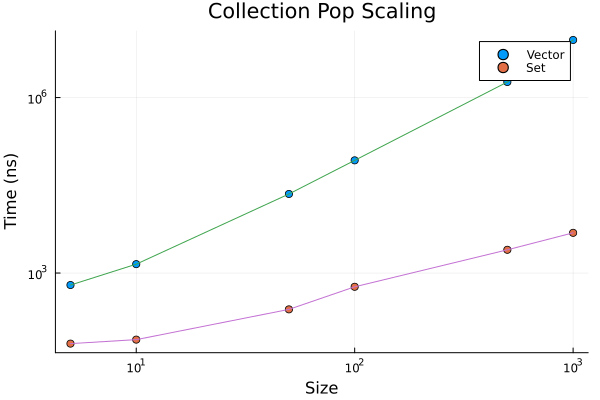

In [15]:
p=plot(coll_sizes, [ time_v time_s ], title="Collection Pop Scaling", 
    label=["Vector" "Set"], xlabel="Size", ylabel="Time (ns)",
    seriestype=:scatter,
    yscale=:log10, xscale=:log10)
plot!(p, coll_sizes, [ time_v time_s ], label=["" ""])

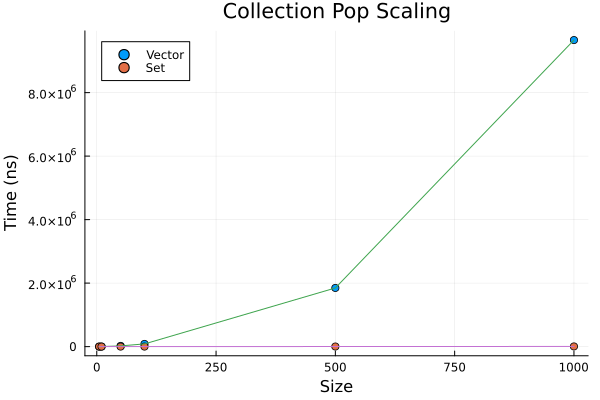

In [16]:
pl=plot(coll_sizes, [ time_v time_s ], title="Collection Pop Scaling", 
    label=["Vector" "Set"], xlabel="Size", ylabel="Time (ns)",
    seriestype=:scatter)
plot!(pl, coll_sizes, [ time_v time_s ], label=["" ""])